In [1]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import EMA
from doberman import Simulation
from doberman import DoberPlot

In [2]:
# Create 'stock_obj'
ticker = 'gm'
stock = Stock(ticker, config='../config.toml.example')
stock.load_data()
stock.snip_dates('2020-01-01', '2020-12-31')

In [3]:
%%time
# Calculate EMA signals
ema_signal = EMA(stock)

CPU times: user 42.6 ms, sys: 1.64 ms, total: 44.3 ms
Wall time: 43.8 ms


In [4]:
%%time
# Run simulation
sim = Simulation(ema_signal.stock_obj)
sim.paper_trade()

CPU times: user 5.34 s, sys: 172 ms, total: 5.52 s
Wall time: 5.62 s


In [5]:
sim.calc_pnl()

gm simulation PnL: $100,480


In [6]:
doberplot = DoberPlot(stock)

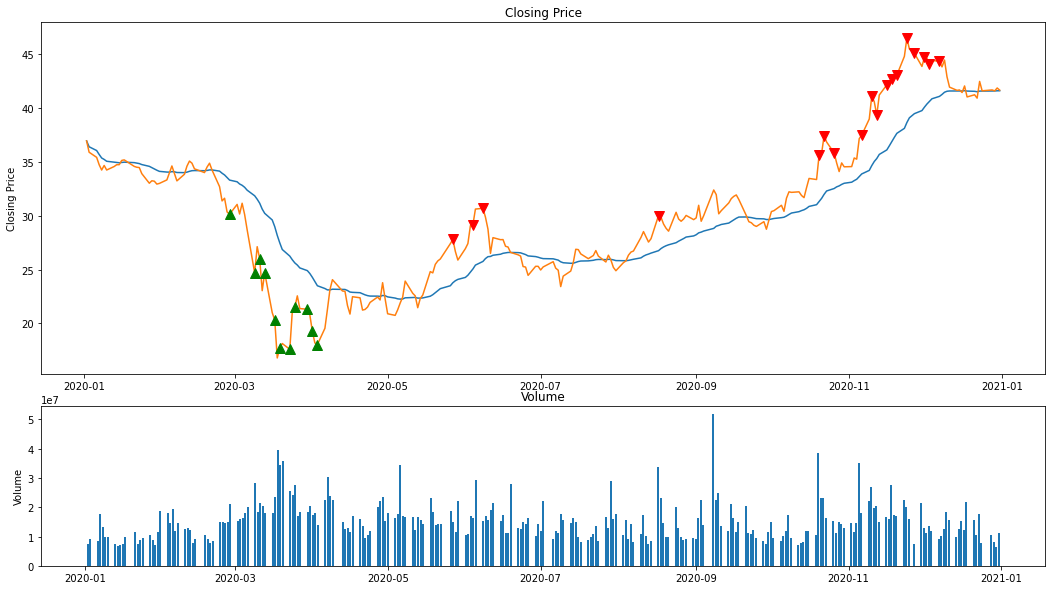

In [7]:
doberplot.order_signal(strategy_name='ema')

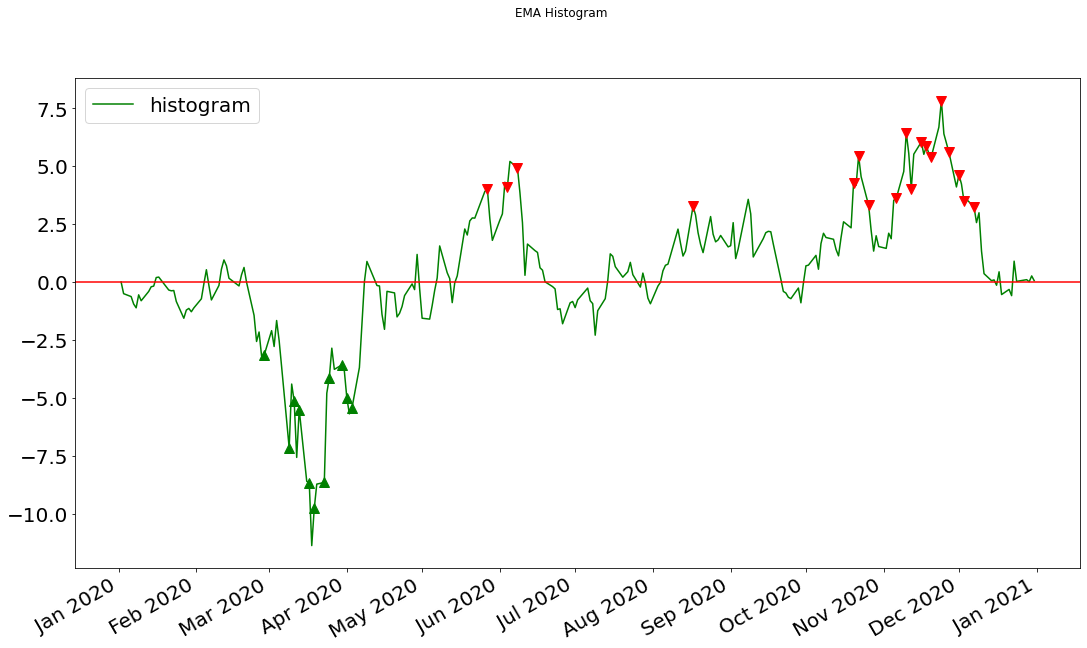

In [8]:
doberplot.histogram(strategy_name='ema')